In [113]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
import os

In [114]:
df = pd.read_excel("ChemRxnData.xlsx")

In [115]:
df2 = df[0:20]

In [116]:
df2

,Role,SMILES,Rxn Id,Rxn SMILES,Volume,Volume Units,Masses,Mass Units,Percent Yield,Std SMILES,molarmass,moles,mol,Match
0,1,ClCC(=O)OC(C)(C)C,ord-00c8c1ee0d984364a306ca1de0ec5843,[CH2:1]([NH2:5])[CH2:2][CH2:3][CH3:4].Cl[CH2:7...,0.0,0,15.050000,2,0.000000,CC(C)(C)OC(=O)CCl,150.605,0.099930,<rdkit.Chem.rdchem.Mol object at 0x7fb1efc213f0>,False
1,1,C(CCC)N,ord-00c8c1ee0d984364a306ca1de0ec5843,[CH2:1]([NH2:5])[CH2:2][CH2:3][CH3:4].Cl[CH2:7...,0.0,0,36.500000,2,0.000000,CCCCN,73.139,0.499050,<rdkit.Chem.rdchem.Mol object at 0x7fb1efc238b0>,False
2,8,C(C)(C)(C)OC(CNCCCC)=O,ord-00c8c1ee0d984364a306ca1de0ec5843,[CH2:1]([NH2:5])[CH2:2][CH2:3][CH3:4].Cl[CH2:7...,0.0,0,17.000000,2,90.900002,CCCCNCC(=O)OC(C)(C)C,187.283,0.090772,<rdkit.Chem.rdchem.Mol object at 0x7fb1efc23060>,False
3,1,[OH-].[Na+],ord-02ce5c141d9f4185b794e6b791a8bd7b,[N+:1]([C:4]1[O:8][C:7]([C:9]2[C:13]([C:14]([N...,0.0,0,0.000000,0,0.000000,[Na+].[OH-],39.997,0.000000,<rdkit.Chem.rdchem.Mol object at 0x7fb1efc21930>,False
4,8,[N+](=O)([O-])C1=CC=C(O1)C1=NN(C=C1C#N)C1=CC=C...,ord-02ce5c141d9f4185b794e6b791a8bd7b,[N+:1]([C:4]1[O:8][C:7]([C:9]2[C:13]([C:14]([N...,0.0,0,0.000000,0,95.000000,N#Cc1cn(-c2ccccc2)nc1-c1ccc([N+](=O)[O-])o1,280.243,0.000000,<rdkit.Chem.rdchem.Mol object at 0x7fb1efc234c0>,False
5,3,ClCCCl,ord-02ce5c141d9f4185b794e6b791a8bd7b,[N+:1]([C:4]1[O:8][C:7]([C:9]2[C:13]([C:14]([N...,100.0,2,0.000000,0,0.000000,ClCCCl,98.960,0.000000,<rdkit.Chem.rdchem.Mol object at 0x7fb1efc22730>,True
6,1,P(=O)(Cl)(Cl)Cl,ord-02ce5c141d9f4185b794e6b791a8bd7b,[N+:1]([C:4]1[O:8][C:7]([C:9]2[C:13]([C:14]([N...,0.0,0,16.500000,2,0.000000,O=P(Cl)(Cl)Cl,153.332,0.107610,<rdkit.Chem.rdchem.Mol object at 0x7fb1efc23df0>,False
7,1,[N+](=O)([O-])C1=CC=C(O1)C1=NN(C=C1C(=O)N)C1=C...,ord-02ce5c141d9f4185b794e6b791a8bd7b,[N+:1]([C:4]1[O:8][C:7]([C:9]2[C:13]([C:14]([N...,0.0,0,10.000000,2,0.000000,NC(=O)c1cn(-c2ccccc2)nc1-c1ccc([N+](=O)[O-])o1,298.258,0.033528,<rdkit.Chem.rdchem.Mol object at 0x7fb1efc22ff0>,False
8,1,Cl.NO,ord-03bb77272c494f0985d3cf21f65708e6,C1O[CH:4]([C:5]2[C:6]([C:10]3[O:11][C:12]([N+:...,0.0,0,0.900000,2,0.000000,Cl.NO,69.491,0.012951,<rdkit.Chem.rdchem.Mol object at 0x7fb1efc22ea0>,True
9,1,C1COC(C=2C(=NNC2)C=2OC(=CC2)[N+](=O)[O-])O1,ord-03bb77272c494f0985d3cf21f65708e6,C1O[CH:4]([C:5]2[C:6]([C:10]3[O:11][C:12]([N+:...,0.0,0,2.500000,2,0.000000,O=[N+]([O-])c1ccc(-c2n[nH]cc2C2OCCO2)o1,251.198,0.009952,<rdkit.Chem.rdchem.Mol object at 0x7fb1efc221f0>,False


In [117]:
smiles = df2["SMILES"][0]

In [118]:
smiles

'ClCC(=O)OC(C)(C)C'

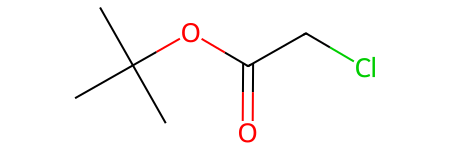

In [119]:
molecule = rdkit.Chem.MolFromSmiles(smiles)
molecule

In [120]:
molecule = Chem.AddHs(molecule)
print(molecule.GetNumAtoms())
AllChem.EmbedMolecule(molecule)
AllChem.UFFOptimizeMolecule(molecule)
molecule.GetConformer()
print()

for i, atom in enumerate(molecule.GetAtoms()):
    positions = molecule.GetConformer().GetAtomPosition(i)
    print(atom.GetSymbol(), positions.x, positions.y, positions.z)

20

Cl 3.953933008044389 0.14676917363347836 -0.21977921883729826
C 2.7711300091258573 -0.9896770820262236 -0.9085215644218492
C 1.486515018011884 -0.8868546487299686 -0.15851625108865577
O 1.282079134041092 -1.6437510702784361 0.8281744431840847
O 0.5500236504319098 0.0853859763640433 -0.5409225632504929
C -0.714339519114286 0.34031520436245344 0.08904687907179874
C -1.6189499822503284 -0.9045964305870973 0.014173717345698467
C -0.5122035099086993 0.7776417303420341 1.5524806003493035
C -1.3837373441319984 1.4872472530210306 -0.6833769471826878
H 2.603070522811297 -0.7386204434452902 -1.9766964794807185
H 3.1736129151004637 -2.022797502992174 -0.8437490590629623
H -1.2181863568943048 -1.7339919439660736 0.6317212221855139
H -1.6983889015461036 -1.257876796935442 -1.0362367834994457
H -2.639151597879824 -0.6691698616422516 0.387296083179943
H -0.11244947307327736 -0.05122831742677746 2.171342247060478
H 0.2020092373870906 1.6272631176330001 1.603197049604902
H -1.4772172732665667 1.098

In [121]:
#1. Convert SMILES column in df2 to a list

smiles_list = df2['SMILES'].values.tolist()
print("Smiles Column:", smiles_list)

Smiles Column: ['ClCC(=O)OC(C)(C)C', 'C(CCC)N', 'C(C)(C)(C)OC(CNCCCC)=O', '[OH-].[Na+]', '[N+](=O)([O-])C1=CC=C(O1)C1=NN(C=C1C#N)C1=CC=CC=C1', 'ClCCCl', 'P(=O)(Cl)(Cl)Cl', '[N+](=O)([O-])C1=CC=C(O1)C1=NN(C=C1C(=O)N)C1=CC=CC=C1', 'Cl.NO', 'C1COC(C=2C(=NNC2)C=2OC(=CC2)[N+](=O)[O-])O1', 'C(C)(=O)[O-].[Na+]', '[N+](=O)([O-])C1=CC=C(O1)C1=NNC=C1C=NO', 'O', 'C(=O)(O)C1NN(C(C1)=O)C1=CC=C(C=C1)S(=O)(=O)O', 'Cl', 'C([O-])([O-])=O.[Na+].[Na+]', 'C(\\C=C/C(=O)[O-])(=O)OC', 'C([O-])([O-])=O.[Na+].[Na+]', 'N(N)C1=CC=C(C=C1)S(=O)(=O)[O-]', 'CN(C1=CC=C(C(=O)C2=C(C(=O)O)C(=C(C(=C2Cl)Cl)Cl)Cl)C=C1)C']


In [122]:
#2. Iterate SMILES to mol file 


mol_list = []

for smiles in smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        mol_list.append(mol)
    else:
        print(f"Failed to convert SMILES: {smiles}")

for i, mol in enumerate(mol_list):
    print(f"Molecule {i+1}: {Chem.MolToSmiles(mol)}")

Molecule 1: CC(C)(C)OC(=O)CCl
Molecule 2: CCCCN
Molecule 3: CCCCNCC(=O)OC(C)(C)C
Molecule 4: [Na+].[OH-]
Molecule 5: N#Cc1cn(-c2ccccc2)nc1-c1ccc([N+](=O)[O-])o1
Molecule 6: ClCCCl
Molecule 7: O=P(Cl)(Cl)Cl
Molecule 8: NC(=O)c1cn(-c2ccccc2)nc1-c1ccc([N+](=O)[O-])o1
Molecule 9: Cl.NO
Molecule 10: O=[N+]([O-])c1ccc(-c2n[nH]cc2C2OCCO2)o1
Molecule 11: CC(=O)[O-].[Na+]
Molecule 12: O=[N+]([O-])c1ccc(-c2n[nH]cc2C=NO)o1
Molecule 13: O
Molecule 14: O=C(O)C1CC(=O)N(c2ccc(S(=O)(=O)O)cc2)N1
Molecule 15: Cl
Molecule 16: O=C([O-])[O-].[Na+].[Na+]
Molecule 17: COC(=O)/C=C\C(=O)[O-]
Molecule 18: O=C([O-])[O-].[Na+].[Na+]
Molecule 19: NNc1ccc(S(=O)(=O)[O-])cc1
Molecule 20: CN(C)c1ccc(C(=O)c2c(Cl)c(Cl)c(Cl)c(Cl)c2C(=O)O)cc1


In [123]:
#3. Iteratate over your molecule list to get coordinates

xyz_coords_list = []

for mol in mol_list:
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol, randomSeed=42)
    AllChem.UFFOptimizeMolecule(mol)
    conf = mol.GetConformer()
    xyz_coords = []
    for atom in mol.GetAtoms():
        pos = conf.GetAtomPosition(atom.GetIdx())
        xyz_coords.append((atom.GetSymbol(), pos.x, pos.y, pos.z))
    
    xyz_coords_list.append(xyz_coords)

for i, coords in enumerate(xyz_coords_list):
    print(f"Molecule {i+1} XYZ coordinates:")
    for atom, x, y, z in coords:
        print(f"{atom}: {x:.4f}, {y:.4f}, {z:.4f}")
    print("\n")

Molecule 1 XYZ coordinates:
Cl: 3.8883, 0.7199, -0.2685
C: 2.9856, -0.7594, 0.1335
C: 1.5814, -0.6333, -0.3519
O: 1.2834, -1.0500, -1.5034
O: 0.6299, -0.0095, 0.4690
C: -0.7492, 0.2223, 0.1452
C: -1.3873, 0.9261, 1.3526
C: -1.4814, -1.1114, -0.0975
C: -0.8698, 1.1401, -1.0864
H: 2.9906, -0.9020, 1.2344
H: 3.4808, -1.6325, -0.3418
H: -0.8680, 1.8872, 1.5570
H: -1.3019, 0.2891, 2.2593
H: -2.4632, 1.1375, 1.1689
H: -1.1123, -1.6150, -1.0140
H: -2.5726, -0.9408, -0.2230
H: -1.3264, -1.7958, 0.7639
H: -0.2755, 2.0663, -0.9335
H: -1.9304, 1.4238, -1.2600
H: -0.5019, 0.6372, -2.0038


Molecule 2 XYZ coordinates:
C: 1.5029, -0.1818, 0.0911
C: 0.0940, 0.4113, 0.0073
C: -0.9727, -0.6851, 0.1069
C: -2.3779, -0.0961, 0.0225
N: 2.5006, 0.8808, 0.0174
H: 1.6615, -0.9055, -0.7400
H: 1.6184, -0.7220, 1.0567
H: -0.0441, 1.1398, 0.8365
H: -0.0193, 0.9505, -0.9590
H: -0.8669, -1.2250, 1.0731
H: -0.8385, -1.4150, -0.7211
H: -2.5190, 0.4281, -0.9467
H: -2.5470, 0.6195, 0.8551
H: -3.1278, -0.9116, 0.0975
H:

In [124]:
#4. Save all molecules (with coordinates) as xyz in there own folder with "non-specific names" i.e molecule1, molecule2.... hint... look up f strings


output_dir = "molecule_xyz_files"
os.makedirs(output_dir, exist_ok=True)

for i, coords in enumerate(xyz_coords_list):
    filename = os.path.join(output_dir, f"molecule{i+1}.xyz")
    with open(filename, 'w') as file:
        file.write(f"{len(coords)}\n")
        file.write(f"Molecule {i+1}\n")
        
        for atom, x, y, z in coords:
            file.write(f"{atom} {x:.4f} {y:.4f} {z:.4f}\n")
    
    print(f"Saved {filename}")

Saved molecule_xyz_files/molecule1.xyz
Saved molecule_xyz_files/molecule2.xyz
Saved molecule_xyz_files/molecule3.xyz
Saved molecule_xyz_files/molecule4.xyz
Saved molecule_xyz_files/molecule5.xyz
Saved molecule_xyz_files/molecule6.xyz
Saved molecule_xyz_files/molecule7.xyz
Saved molecule_xyz_files/molecule8.xyz
Saved molecule_xyz_files/molecule9.xyz
Saved molecule_xyz_files/molecule10.xyz
Saved molecule_xyz_files/molecule11.xyz
Saved molecule_xyz_files/molecule12.xyz
Saved molecule_xyz_files/molecule13.xyz
Saved molecule_xyz_files/molecule14.xyz
Saved molecule_xyz_files/molecule15.xyz
Saved molecule_xyz_files/molecule16.xyz
Saved molecule_xyz_files/molecule17.xyz
Saved molecule_xyz_files/molecule18.xyz
Saved molecule_xyz_files/molecule19.xyz
Saved molecule_xyz_files/molecule20.xyz


1. Convert SMILES column in df2 to a list
2. Iterate SMILES to mol file 
3. Iteratate over your molecule list to get coordinates
4. Save all molecules (with coordinates) as xyz in there own folder with "non-specific names" i.e molecule1, molecule2.... hint... look up f strings
5. Garrett to send .com file example --> Write script to open and write keyword arguments for .com/gaussian inputs
6. HPC time